# <p style="font-family:Bradley Hand ITC;font-size:150%;text-align:center;color:#1ECBC7;">Import Necessary Libraries</p>

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# <p style="font-family:Bradley Hand ITC;font-size:150%;text-align:center;color:#1ECBC7;">Load DATASET</p>

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")

In [5]:
print(("Head of Train Data"),train_df.head())
print(("Shape of Train Data"), train_df.shape)

Head of Train Data    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500 

In [6]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [11]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


Null Values in Train data
Age         177
Cabin       687
Embarked      2
dtype: int64


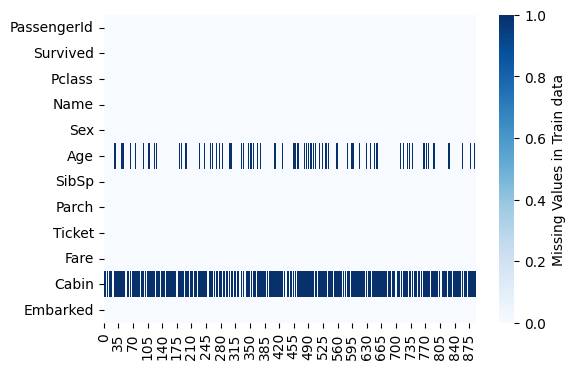

In [12]:
print("Null Values in Train data")
train_df_null  = train_df.isnull().sum()
print(train_df_null[train_df_null>0])

plt.figure(figsize=(6, 4))
sns.heatmap(train_df.isna().transpose(), cmap="Blues", cbar_kws={'label': 'Missing Values in Train data'})
plt.show()

Null Values in Test data
Age       86
Fare       1
Cabin    327
dtype: int64


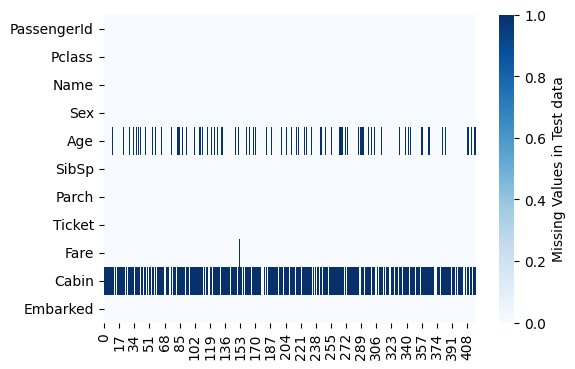

In [13]:
print("Null Values in Test data")
test_df_null  = test_df.isnull().sum()
print(test_df_null[test_df_null>0])

plt.figure(figsize=(6, 4))
sns.heatmap(test_df.isna().transpose(), cmap="Blues", cbar_kws={'label': 'Missing Values in Test data'})
plt.show()

In [14]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
# Fill missing values in 'Age' and 'Fare' with mean, and 'Cabin' with 'Unknown'
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
train_df['Fare'].fillna(train_df['Fare'].mean(), inplace=True)
train_df['Cabin'].fillna('Unknown', inplace=True)
train_df['Embarked'].fillna('S', inplace=True)

test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)
test_df['Cabin'].fillna('Unknown', inplace=True)

# Verify no missing values
print("Null Values in Train Data after Imputation")
print(train_df.isnull().sum())
print("Null Values in Test Data after Imputation")
print(test_df.isnull().sum())

Null Values in Train Data after Imputation
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
Null Values in Test Data after Imputation
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [16]:
# Encode 'Sex' as binary values
train_df['Sex'].replace(['male', 'female'], [1, 0], inplace=True)
test_df['Sex'].replace(['male', 'female'], [1, 0], inplace=True)

# Use one-hot encoding for 'Embarked'
train_df = pd.get_dummies(train_df, columns=['Embarked'])
test_df = pd.get_dummies(test_df, columns=['Embarked'])

In [17]:
# Drop non-informative columns
train_df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)
test_df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

# Create 'AgeGroup' from 'Age'
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Infant', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins, labels=labels)
test_df['AgeGroup'] = pd.cut(test_df['Age'], bins, labels=labels)

# One-hot encode 'AgeGroup'
train_df = pd.get_dummies(train_df, columns=['AgeGroup'])
test_df = pd.get_dummies(test_df, columns=['AgeGroup'])

In [18]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,AgeGroup_Infant,AgeGroup_Baby,AgeGroup_Child,AgeGroup_Teenager,AgeGroup_Student,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior
0,1,0,3,1,22.0,1,0,7.2500,False,False,True,False,False,False,False,True,False,False,False
1,2,1,1,0,38.0,1,0,71.2833,True,False,False,False,False,False,False,False,False,True,False
2,3,1,3,0,26.0,0,0,7.9250,False,False,True,False,False,False,False,False,True,False,False
3,4,1,1,0,35.0,1,0,53.1000,False,False,True,False,False,False,False,False,True,False,False
4,5,0,3,1,35.0,0,0,8.0500,False,False,True,False,False,False,False,False,True,False,False


In [19]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,AgeGroup_Infant,AgeGroup_Baby,AgeGroup_Child,AgeGroup_Teenager,AgeGroup_Student,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior
0,892,3,1,34.5,0,0,7.8292,False,True,False,False,False,False,False,False,True,False,False
1,893,3,0,47.0,1,0,7.0000,False,False,True,False,False,False,False,False,False,True,False
2,894,2,1,62.0,0,0,9.6875,False,True,False,False,False,False,False,False,False,False,True
3,895,3,1,27.0,0,0,8.6625,False,False,True,False,False,False,False,False,True,False,False
4,896,3,0,22.0,1,1,12.2875,False,False,True,False,False,False,False,True,False,False,False


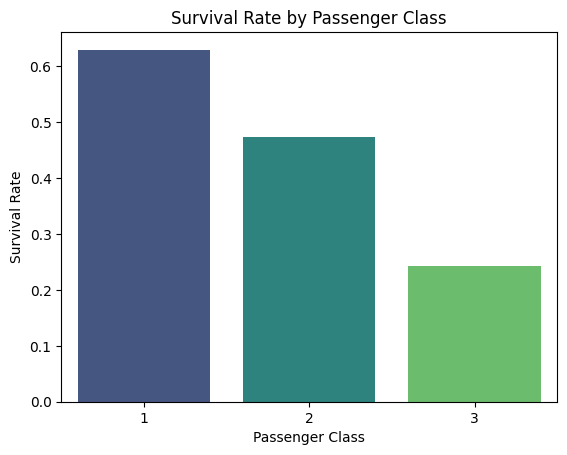

In [20]:
# Visualization of survival rates
survival_rate_by_class = train_df[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False)
sns.barplot(x=survival_rate_by_class.index, y='Survived', data=survival_rate_by_class, palette='viridis')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

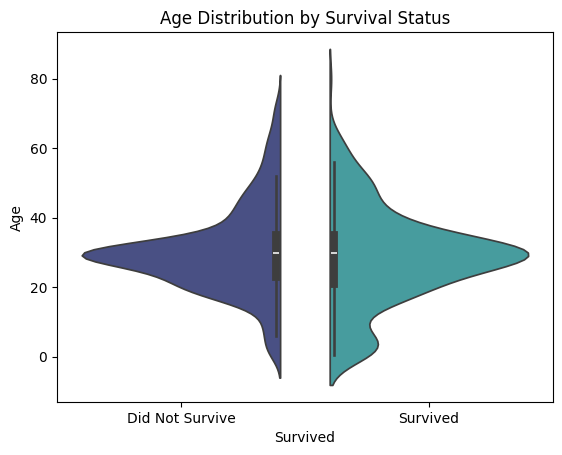

In [21]:
# Age distribution by survival status
sns.violinplot(x='Survived', y='Age', data=train_df, palette="mako", split=True)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.show()

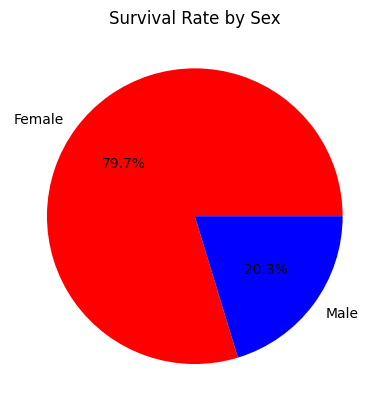

In [22]:
# Survival rate by sex
survived_sex = train_df.groupby('Sex')['Survived'].mean()
plt.pie(survived_sex, labels=['Female', 'Male'], autopct='%1.1f%%', colors=['red', 'blue'])
plt.title('Survival Rate by Sex')
plt.show()

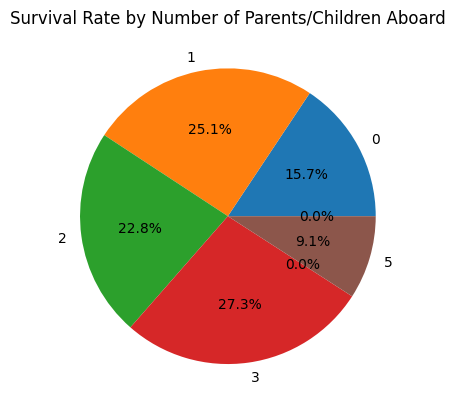

In [23]:
# Survival rate by number of parents/children aboard
train_df.groupby('Parch')['Survived'].mean().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Survival Rate by Number of Parents/Children Aboard')
plt.show()

In [24]:
# Drop the columns used for feature engineering if not needed for modeling
train_df.drop(columns=['PassengerId'], inplace=True)
test_df.drop(columns=['PassengerId'], inplace=True)

# Ensure both datasets have the same columns after processing
common_columns = list(set(train_df.columns).intersection(set(test_df.columns)))
train_df = train_df[common_columns]
test_df = test_df[common_columns]

print("Final Train Data Shape:", train_df.shape)
print("Final Test Data Shape:", test_df.shape)

Final Train Data Shape: (891, 17)
Final Test Data Shape: (418, 17)


In [25]:
train_df.head()

,Parch,Sex,AgeGroup_Young Adult,Age,AgeGroup_Baby,SibSp,AgeGroup_Infant,AgeGroup_Child,AgeGroup_Teenager,Pclass,AgeGroup_Adult,Fare,Embarked_Q,AgeGroup_Student,Embarked_S,Embarked_C,AgeGroup_Senior
0,0,1,False,22.0,False,1,False,False,False,3,False,7.2500,False,True,True,False,False
1,0,0,False,38.0,False,1,False,False,False,1,True,71.2833,False,False,False,True,False
2,0,0,True,26.0,False,0,False,False,False,3,False,7.9250,False,False,True,False,False
3,0,0,True,35.0,False,1,False,False,False,1,False,53.1000,False,False,True,False,False
4,0,1,True,35.0,False,0,False,False,False,3,False,8.0500,False,False,True,False,False


In [26]:
test_df.head()

,Parch,Sex,AgeGroup_Young Adult,Age,AgeGroup_Baby,SibSp,AgeGroup_Infant,AgeGroup_Child,AgeGroup_Teenager,Pclass,AgeGroup_Adult,Fare,Embarked_Q,AgeGroup_Student,Embarked_S,Embarked_C,AgeGroup_Senior
0,0,1,True,34.5,False,0,False,False,False,3,False,7.8292,True,False,False,False,False
1,0,0,False,47.0,False,1,False,False,False,3,True,7.0000,False,False,True,False,False
2,0,1,False,62.0,False,0,False,False,False,2,False,9.6875,True,False,False,False,True
3,0,1,True,27.0,False,0,False,False,False,3,False,8.6625,False,False,True,False,False
4,1,0,False,22.0,False,1,False,False,False,3,False,12.2875,False,True,True,False,False
